## Данные

Данные в [архиве](https://drive.google.com/file/d/15o7fdxTgndoy6K-e7g8g1M2-bOOwqZPl/view?usp=sharing). В нём два файла:
- `news_train.txt` тренировочное множество
- `news_test.txt` тренировочное множество

С некоторых новостных сайтов были загружены тексты новостей за период  несколько лет, причем каждая новость принаделжит к какой-то рубрике: `science`, `style`, `culture`, `life`, `economics`, `business`, `travel`, `forces`, `media`, `sport`.

В каждой строке файла содержится метка рубрики, заголовок новостной статьи и сам текст статьи, например:

>    **sport**&nbsp;&lt;tab&gt;&nbsp;**Сборная Канады по хоккею разгромила чехов**&nbsp;&lt;tab&gt;&nbsp;**Сборная Канады по хоккею крупно об...**

# Задача

1. Обработать данные, получив для каждого текста набор токенов
Обработать токены с помощью (один вариант из трех):
    - pymorphy2
    - русского [snowball стеммера](https://www.nltk.org/howto/stem.html)
    - [SentencePiece](https://github.com/google/sentencepiece) или [Huggingface Tokenizers](https://github.com/huggingface/tokenizers)
    
    
2. Обучить word embeddings (fastText, word2vec, gloVe) на тренировочных данных. Можно использовать [gensim](https://radimrehurek.com/gensim/models/word2vec.html) . Продемонстрировать семантические ассоциации. 

3. Реализовать алгоритм классификации, посчитать точноть на тестовых данных, подобрать гиперпараметры. Метод векторизации выбрать произвольно - можно использовать $tf-idf$ с понижением размерности (см. scikit-learn), можно использовать обученные на предыдущем шаге векторные представления, можно использовать [предобученные модели](https://rusvectores.org/ru/models/). Имейте ввиду, что простое "усреднение" токенов в тексте скорее всего не даст положительных результатов. Нужно реализовать два алгоритмов из трех:
     - SVM
     - наивный байесовский классификатор
     - логистическая регрессия
    

4.* Реализуйте классификацию с помощью нейросетевых моделей. Например [RuBERT](http://docs.deeppavlov.ai/en/master/features/models/bert.html) или [ELMo](https://rusvectores.org/ru/models/).

lines = list(open('./news_train.txt', 'r', encoding='utf-8'))

In [14]:
import random
random.shuffle(lines)


In [18]:
with open('./news_test.txt', 'w', encoding='utf-8') as f:
    for line in lines[15000:18000]:
        f.write(line)

In [16]:
from collections import Counter

Counter([line.split('\t')[0] for line in lines[:15000]])

Counter({'sport': 2215,
         'culture': 2053,
         'science': 2156,
         'media': 2111,
         'economics': 2080,
         'life': 2033,
         'forces': 1225,
         'travel': 289,
         'style': 284,
         'business': 554})

In [ ]:
'https://drive.google.com/file/d/1mG3tPS_59pANrgwd6T2IgnHWgph4vYbg/view?usp=sharing'

In [7]:
with open("6_data/news_train.txt") as f:
    lines = f.readlines()

tags = [line.split('\t')[0] for line in lines]
train_title = [line.split('\t')[1] for line in lines]
train_text = [line.split('\t')[2] for line in lines]

In [8]:
train_text[0][0:100]

'Нападающий «Вашингтон Кэпиталз» Александр Овечкин передал детской хоккейной школе автомобиль, получе'

In [10]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()


import re
morph = pymorphy2.MorphAnalyzer()

def process(text):
    """
    оставим русский текст только
    """
    text = text.lower()
    text = re.sub('[^а-я ]', '', text) 
    return text

def morphy_process_word(text):
    return morph.parse(text)[0].normal_form

import nltk

def process_text(text):
    """
    всё вместе: регулярка, токенизировали, morphy
    """
    text = nltk.word_tokenize(process(text))
    text = ' '.join([morphy_process_word(word) for word in text])
    return text


print(train_text[0][0:200])
print('---')
print(process_text(train_text[0][0:200]))


Нападающий «Вашингтон Кэпиталз» Александр Овечкин передал детской хоккейной школе автомобиль, полученный им после окончания Матча всех звезд Национальной хоккейной лиги (НХЛ). Об этом сообщается на оф
---
нападать вашингтон кэпиталзти александр овечкин передать детский хоккейный школа автомобиль получить имя после окончание матч весь звезда национальный хоккейный лига нхл о это сообщаться на оф


In [11]:
count = 0

with open('6_data/train_preproc', 'w+') as f: 

    for (tag,title, text) in zip(tags, train_title, train_text):
        final = tag + '\t' + process_text(title) + '\t' + process_text(text) + '\n'
        
        f.write(final)
        count +=1 
        if (count % 1000 == 0):
            print("performed " + str(count) + " of " + str(len(tags)))

performed 1000 of 15000
performed 2000 of 15000
performed 3000 of 15000
performed 4000 of 15000
performed 5000 of 15000
performed 6000 of 15000
performed 7000 of 15000
performed 8000 of 15000
performed 9000 of 15000
performed 10000 of 15000
performed 11000 of 15000
performed 12000 of 15000
performed 13000 of 15000
performed 14000 of 15000
performed 15000 of 15000


In [12]:
with open("6_data/news_test.txt") as f:
    lines = f.readlines()

tags = [line.split('\t')[0] for line in lines]
test_title = [line.split('\t')[1] for line in lines]
test_text = [line.split('\t')[2] for line in lines]

count = 0

with open('6_data/test_preproc', 'w+') as f: 

    for (tag, title, text) in zip(tags, test_title, test_text):
        final = tag + '\t' + process_text(title) + '\t' + process_text(text) + '\n'
        
        f.write(final)
        count +=1 
        if (count % 1000 == 0):
            print("performed " + str(count) + " of " + str(len(tags)))

performed 1000 of 3000
performed 2000 of 3000
performed 3000 of 3000


In [37]:
!head 6_data/news_test.txt

culture	Жительница Ямала победила в первом песенном конкурсе «Новая звезда»	Жительница Ямало-Ненецкого автономного округа Елена Лаптандер победила в первом всероссийском песенном конкурсе «Новая звезда», сообщили «Ленте.ру» организаторы события. В качестве награды ей досталась статуэтка в форме звезды и денежный приз — один миллион рублей. По словам финалистки, вознаграждение она планирует передать в благотворительный фонд «Подари жизнь».Три дополнительных приза достались Руслану Ивакину из Хакасии, фолк-группе «Ярилов Зной» из Воронежской области и Александру Куулару из Тывы. Призеров с помощью смс-голосования выбирали зрители телеканала «Звезда», который транслировал конкурс. Всего на финальном гала-концерте выступили 16 участников.Ведущими шоу стали актеры Сергей Безруков и Аврора. На концерте прозвучали популярные песни военных лет: «Журавли», «Довоенный вальс», «Мой милый, если б не было войны», «Цветы на дорогах войны», песня десантно-штурмового батальона из кинофильма «Белорусск

In [18]:
with open("6_data/train_preproc") as f:
    lines = f.readlines()
    
lines = [row.split('\t')  for row in lines]

In [23]:
train_corpora = []

for tupl in lines:
    train_corpora.append(tupl[1].split(' ') + tupl[2].replace('\n','').split(' '))


In [30]:
from gensim.models import FastText

model = FastText(window=3, min_count=5)

model.build_vocab(sentences=train_corpora)
model.train(sentences=train_corpora, total_examples=len(train_corpora), epochs=10)



Семантическая близость. Было много очепяток в симиларах, подкрутил min_count. 

In [33]:

model.wv.most_similar(positive=['газета'])

[('газетар', 0.9533445239067078),
 ('газетыр', 0.9032759070396423),
 ('газетер', 0.8895081877708435),
 ('изданиев', 0.780181348323822),
 ('коммерсантъвласть', 0.7664609551429749),
 ('издание', 0.7628331780433655),
 ('коммерсант', 0.7533077001571655),
 ('коммерсантъ', 0.7430510520935059),
 ('сми', 0.7167691588401794),
 ('коммерсантъпо', 0.7151848077774048)]

In [35]:
model.wv.most_similar(positive=['театр'])

[('кинотеатр', 0.8234166502952576),
 ('атр', 0.7477636337280273),
 ('музеон', 0.6518993377685547),
 ('музей', 0.6495088934898376),
 ('спектакль', 0.6379435658454895),
 ('балет', 0.6317172646522522),
 ('театральный', 0.629730761051178),
 ('беатрис', 0.623892605304718),
 ('гогольцентр', 0.6233833432197571),
 ('галерея', 0.6188597679138184)]

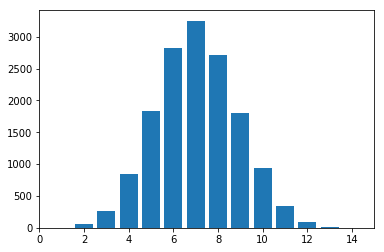

In [57]:
#посмотрим на распределение длин тайтлов
from collections import Counter

text_lens = [len(text[2].split(' ')) for text in lines]
title_lens = [len(text[1].split(' ')) for text in lines]
text_len_counter = Counter(text_lens)
title_len_counter = Counter(title_lens)

from matplotlib import pyplot as plt
%matplotlib inline
plt.bar(title_len_counter.keys(), title_len_counter.values(), )
plt.xlim(0, 15);


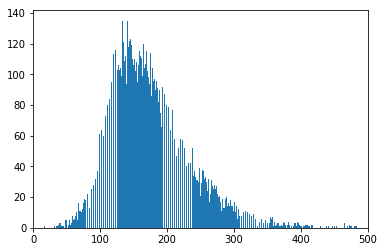

In [59]:
#посмотрим на распределение длин текстов

from matplotlib import pyplot as plt
%matplotlib inline
plt.bar(text_len_counter.keys(), text_len_counter.values(), )
plt.xlim(0, 500);


Распределение тайтлов выглядит хорошо. Распределение текстов чутка скошенно в сторону длинных, но вроде TF-IDF должен это пережить

In [38]:
#дернем из nltk стоп-слов

import nltk
from nltk.corpus import stopwords

ru_stop_words = stopwords.words('russian')
print(ru_stop_words[0:20])

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты']


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.svm import LinearSVC


# Начнем с свм. Есть интуиция что он тут зайдет

In [62]:


tf_idf = TfidfVectorizer(max_df=0.7, min_df=5, stop_words=ru_stop_words)


clf = LinearSVC()

pipeline = Pipeline([('tf-idf', tf_idf), ('clf', clf)])


In [72]:
import pandas


# сконкатенируем заголовки и тексы. 
# Хотя прикольнее было бы считать TFIDF по ним отдельно и обучать двумя векторами. 

labels = [text[0] for text in lines]
titles_texts = [' '.join(text[1].split(' ') + text[2].split(' ')) for text in lines] 
#texts = [text[2].split(' ') for text in lines]

data_train = pd.DataFrame(list(zip(labels,  titles_texts)), columns =['labels', 'texts'])

data_train.head()

,labels,texts
0,sport,овечкин пожертвовать детский хоккейный школа а...
1,culture,рекордно дорогой статуя майя признать подделка...
2,science,представить флагман в защитить корпус южнокоре...
3,sport,с футболист спартак снять четырехматчевой диск...
4,media,объединиться с интернетиздание объявить о свой...


In [85]:
import pandas

#сделаем аналогично для теста

with open("6_data/test_preproc") as f:
    lines = f.readlines()
    
lines = [row.split('\t')  for row in lines]
labels = [text[0] for text in lines]
titles_texts = [' '.join(text[1].split(' ') + text[2].split(' ')) for text in lines] 
#texts = [text[2].split(' ') for text in lines]

data_test = pd.DataFrame(list(zip(labels,  titles_texts)), columns =['labels', 'texts'])

data_test.head()

,labels,texts
0,culture,жительница ямал победить в первое песенный кон...
1,media,почти половина пользователь никогда не писать ...
2,media,билайн начать реклама роуминг под песенка трол...
3,business,потерять миллиард евро изз отмена южный поток ...
4,culture,вино дизель назвать форсажа достойный оскар ак...


In [114]:
fitted = pipeline.fit(data_train['texts'], data_train['labels'])

pred = pipeline.predict(data_test['texts'])

score = metrics.f1_score(data_test['labels'], pred, average='macro')

print(score)

0.8555762912987068


Ну, что-то адекватное выдало. Давайте посмотрим confusion matrix

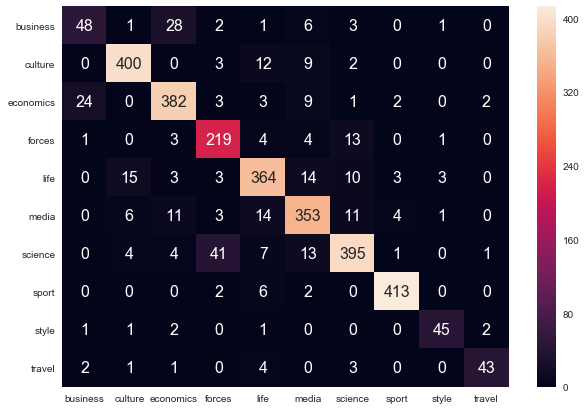

In [133]:
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sn

cm = confusion_matrix(data_test['labels'], pred)

#cm_display = ConfusionMatrixDisplay(cm).plot()

class_indices = fitted.steps[1][1].classes_

df_cm = pd.DataFrame(cm, index = [i for i in class_indices],
                  columns = [i for i in class_indices])

plt.figure(figsize = (10,7))

sn.set() # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d') # font size


Хуже всего себя чувствуют мини-классы: buiseness, style, travel. Это логично. Причем оч часто "бизнесс" путают с экономикой - это тоже логично. 


In [158]:


def perform_cycle(pipe, data_train, data_test):
    """
    напишу функцию для всего вышеперечисленного
    """
    fitted = pipe.fit(data_train['texts'], data_train['labels'])

    pred = pipe.predict(data_test['texts'])
    cm = confusion_matrix(data_test['labels'], pred)
    score = metrics.f1_score(data_test['labels'], pred, average='macro')
    
    #предполагаем что в конце стоит классификатор всегда
    class_indices = fitted.steps[-1][1].classes_
    
    df_cm = pd.DataFrame(cm, index = [i for i in class_indices],
                  columns = [i for i in class_indices])

    plt.figure(figsize = (10,7))

    sn.set() # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d') # font size

    return score, cm


In [159]:
import pandas


with open("6_data/train_preproc") as f:
    lines = f.readlines()

lines = [row.split('\t')  for row in lines]

#а вот так грязно я унес слова из заголовка в отдельное под-пространство
titles_texts = [' '.join(['title_' + word for word in text[1].split(' ')] + text[2].split(' ')) for text in lines] 
labels = [text[0] for text in lines]

data_train = pd.DataFrame(list(zip(labels,  titles_texts)), columns =['labels', 'texts'])

#сделаем аналогично для теста

with open("6_data/test_preproc") as f:
    lines = f.readlines()
    
lines = [row.split('\t')  for row in lines]
labels = [text[0] for text in lines]
titles_texts = [' '.join(text[1].split(' ') + text[2].split(' ')) for text in lines] 

data_test = pd.DataFrame(list(zip(labels,  titles_texts)), columns =['labels', 'texts'])


data_train.head()



,labels,texts
0,sport,title_овечкин title_пожертвовать title_детский...
1,culture,title_рекордно title_дорогой title_статуя titl...
2,science,title_представить title_флагман title_в title_...
3,sport,title_с title_футболист title_спартак title_сн...
4,media,title_объединиться title_с интернетиздание объ...


/Users/eugeny.malyutin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


(0.839260460178689, array([[ 31,   1,  44,   2,   1,   7,   3,   0,   1,   0],
        [  0, 398,   0,   2,  14,   8,   4,   0,   0,   0],
        [ 10,   0, 393,   5,   3,  10,   1,   2,   0,   2],
        [  1,   0,   2, 222,   6,   4,   8,   0,   1,   1],
        [  0,  15,   2,   4, 364,  13,   9,   4,   4,   0],
        [  0,   5,  12,   1,  16, 351,  11,   6,   1,   0],
        [  0,   6,   2,  44,   5,  13, 394,   1,   0,   1],
        [  0,   0,   0,   4,   5,   0,   0, 414,   0,   0],
        [  1,   3,   2,   0,   0,   0,   0,   0,  44,   2],
        [  0,   2,   1,   0,   7,   0,   2,   0,   0,  42]]))

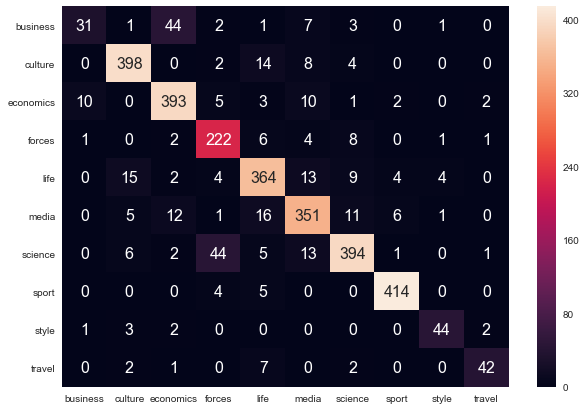

In [160]:
#но помогло не особо, судя по изменению F1Score

perform_cycle(pipeline, data_train, data_test)

/Users/eugeny.malyutin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


(0.7797114465345423, array([[ 12,   2,  58,   4,   1,   5,   6,   0,   1,   1],
        [  0, 392,   0,   2,  20,   6,   6,   0,   0,   0],
        [  4,   1, 384,   8,   8,   8,   7,   2,   2,   2],
        [  0,   0,   4, 219,  11,   5,   4,   0,   1,   1],
        [  0,  16,   0,   3, 369,   6,  11,   6,   4,   0],
        [  0,   7,  15,   7,  33, 315,  19,   5,   2,   0],
        [  0,   7,   5,  52,   9,   9, 383,   1,   0,   0],
        [  0,   0,   0,   5,   8,   0,   0, 410,   0,   0],
        [  1,   3,   2,   1,   0,   0,   2,   1,  40,   2],
        [  0,   3,   2,   0,  10,   1,   3,   0,   0,  35]]))

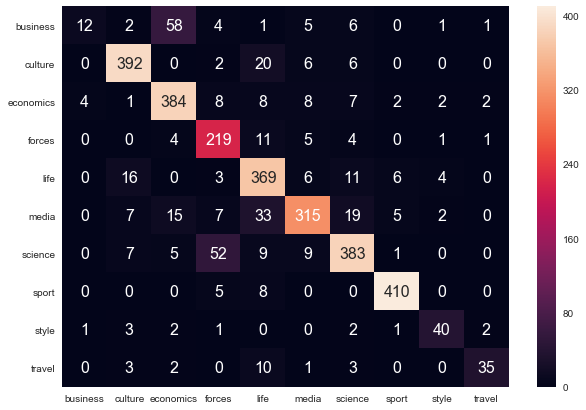

In [164]:
from sklearn.decomposition import TruncatedSVD

#взял truncatedSVD из-за игр с sparce-dense в разных PCA. Годы идут а sklearn все так же хорош =)
ipca = TruncatedSVD(n_components=100)


pipeline_pca = Pipeline([('tf-idf', tf_idf), ('pca', ipca), ('clf', clf)])


perform_cycle(pipeline_pca, data_train, data_test)


... и модельке совсем поплохело. Ну и прощай интерпретабилити . Причем чем больше n_components - тем лучше для модели. думаю, идеальное сжатие тут - его отсутствие. 

Давайте погридсерчим чуть чуть приличия ради


In [185]:
from sklearn.model_selection import GridSearchCV



clf = LinearSVC()

pipeline = Pipeline([('tf-idf', tf_idf), ('clf', clf)])

pipeline.get_params()


params_grid = {
    'tf-idf__max_df':[0.5, 0.7, 0.9],
    'tf-idf__min_df': [1,5,7],
    'clf__C': [0.01, 0.1, 0.5,1.0],
}

grid_SVC = GridSearchCV(pipeline, params_grid, n_jobs=5, scoring='f1_micro', verbose=10)


fitted = grid_SVC.fit(data_train['texts'], data_train['labels'])

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] clf__C=0.01, tf-idf__max_df=0.5, tf-idf__min_df=1 ...............
[CV] clf__C=0.01, tf-idf__max_df=0.5, tf-idf__min_df=1 ...............
[CV] clf__C=0.01, tf-idf__max_df=0.5, tf-idf__min_df=1 ...............
[CV] clf__C=0.01, tf-idf__max_df=0.5, tf-idf__min_df=5 ...............
[CV] clf__C=0.01, tf-idf__max_df=0.5, tf-idf__min_df=5 ...............
[CV]  clf__C=0.01, tf-idf__max_df=0.5, tf-idf__min_df=1, score=0.8095904095904096, total=   4.0s
[CV] clf__C=0.01, tf-idf__max_df=0.5, tf-idf__min_df=5 ...............
[CV]  clf__C=0.01, tf-idf__max_df=0.5, tf-idf__min_df=1, score=0.8048, total=   4.0s
[CV] clf__C=0.01, tf-idf__max_df=0.5, tf-idf__min_df=7 ...............
[CV]  clf__C=0.01, tf-idf__max_df=0.5, tf-idf__min_df=1, score=0.8124124124124125, total=   4.1s
[CV]  clf__C=0.01, tf-idf__max_df=0.5, tf-idf__min_df=5, score=0.8137862137862137, total=   3.9s


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    7.7s


[CV] clf__C=0.01, tf-idf__max_df=0.5, tf-idf__min_df=7 ...............
[CV]  clf__C=0.01, tf-idf__max_df=0.5, tf-idf__min_df=5, score=0.8128, total=   3.8s
[CV] clf__C=0.01, tf-idf__max_df=0.5, tf-idf__min_df=7 ...............
[CV] clf__C=0.01, tf-idf__max_df=0.7, tf-idf__min_df=1 ...............
[CV]  clf__C=0.01, tf-idf__max_df=0.5, tf-idf__min_df=5, score=0.8172172172172172, total=   4.0s
[CV] clf__C=0.01, tf-idf__max_df=0.7, tf-idf__min_df=1 ...............
[CV]  clf__C=0.01, tf-idf__max_df=0.5, tf-idf__min_df=7, score=0.814985014985015, total=   3.9s
[CV] clf__C=0.01, tf-idf__max_df=0.7, tf-idf__min_df=1 ...............
[CV]  clf__C=0.01, tf-idf__max_df=0.5, tf-idf__min_df=7, score=0.8146, total=   3.9s


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:   14.2s


[CV]  clf__C=0.01, tf-idf__max_df=0.5, tf-idf__min_df=7, score=0.8192192192192193, total=   3.9s
[CV] clf__C=0.01, tf-idf__max_df=0.7, tf-idf__min_df=5 ...............
[CV] clf__C=0.01, tf-idf__max_df=0.7, tf-idf__min_df=5 ...............
[CV]  clf__C=0.01, tf-idf__max_df=0.7, tf-idf__min_df=1, score=0.8097902097902098, total=   4.2s
[CV] clf__C=0.01, tf-idf__max_df=0.7, tf-idf__min_df=5 ...............
[CV]  clf__C=0.01, tf-idf__max_df=0.7, tf-idf__min_df=1, score=0.8056000000000001, total=   4.4s
[CV] clf__C=0.01, tf-idf__max_df=0.7, tf-idf__min_df=7 ...............
[CV]  clf__C=0.01, tf-idf__max_df=0.7, tf-idf__min_df=1, score=0.813013013013013, total=   4.3s
[CV]  clf__C=0.01, tf-idf__max_df=0.7, tf-idf__min_df=5, score=0.8133866133866133, total=   4.1s
[CV] clf__C=0.01, tf-idf__max_df=0.7, tf-idf__min_df=7 ...............
[CV]  clf__C=0.01, tf-idf__max_df=0.7, tf-idf__min_df=5, score=0.8126, total=   4.1s
[CV] clf__C=0.01, tf-idf__max_df=0.7, tf-idf__min_df=7 ...............
[CV] 

[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:   22.3s


[CV] clf__C=0.01, tf-idf__max_df=0.9, tf-idf__min_df=1 ...............
[CV]  clf__C=0.01, tf-idf__max_df=0.7, tf-idf__min_df=7, score=0.814985014985015, total=   4.3s
[CV] clf__C=0.01, tf-idf__max_df=0.9, tf-idf__min_df=1 ...............
[CV]  clf__C=0.01, tf-idf__max_df=0.7, tf-idf__min_df=7, score=0.8144, total=   4.1s
[CV]  clf__C=0.01, tf-idf__max_df=0.7, tf-idf__min_df=7, score=0.8194194194194194, total=   4.1s
[CV] clf__C=0.01, tf-idf__max_df=0.9, tf-idf__min_df=5 ...............
[CV] clf__C=0.01, tf-idf__max_df=0.9, tf-idf__min_df=5 ...............
[CV]  clf__C=0.01, tf-idf__max_df=0.9, tf-idf__min_df=1, score=0.808991008991009, total=   4.5s
[CV] clf__C=0.01, tf-idf__max_df=0.9, tf-idf__min_df=5 ...............
[CV]  clf__C=0.01, tf-idf__max_df=0.9, tf-idf__min_df=1, score=0.8062, total=   4.4s
[CV] clf__C=0.01, tf-idf__max_df=0.9, tf-idf__min_df=7 ...............
[CV]  clf__C=0.01, tf-idf__max_df=0.9, tf-idf__min_df=1, score=0.8128128128128128, total=   4.6s
[CV]  clf__C=0.01,

[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:   35.1s


[CV] clf__C=0.01, tf-idf__max_df=0.9, tf-idf__min_df=7 ...............
[CV]  clf__C=0.01, tf-idf__max_df=0.9, tf-idf__min_df=5, score=0.8115999999999999, total=   4.3s
[CV] clf__C=0.01, tf-idf__max_df=0.9, tf-idf__min_df=7 ...............
[CV] clf__C=0.1, tf-idf__max_df=0.5, tf-idf__min_df=1 ................
[CV]  clf__C=0.01, tf-idf__max_df=0.9, tf-idf__min_df=5, score=0.8174174174174175, total=   4.3s
[CV]  clf__C=0.01, tf-idf__max_df=0.9, tf-idf__min_df=7, score=0.8139860139860139, total=   4.3s
[CV] clf__C=0.1, tf-idf__max_df=0.5, tf-idf__min_df=1 ................
[CV] clf__C=0.1, tf-idf__max_df=0.5, tf-idf__min_df=1 ................
[CV]  clf__C=0.01, tf-idf__max_df=0.9, tf-idf__min_df=7, score=0.813, total=   4.4s
[CV] clf__C=0.1, tf-idf__max_df=0.5, tf-idf__min_df=5 ................
[CV]  clf__C=0.01, tf-idf__max_df=0.9, tf-idf__min_df=7, score=0.8184184184184184, total=   4.4s
[CV] clf__C=0.1, tf-idf__max_df=0.5, tf-idf__min_df=5 ................
[CV]  clf__C=0.1, tf-idf__max_d

[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   49.5s


[CV]  clf__C=0.1, tf-idf__max_df=0.5, tf-idf__min_df=5, score=0.8544, total=   4.3s
[CV] clf__C=0.1, tf-idf__max_df=0.5, tf-idf__min_df=7 ................
[CV] clf__C=0.1, tf-idf__max_df=0.7, tf-idf__min_df=1 ................
[CV]  clf__C=0.1, tf-idf__max_df=0.5, tf-idf__min_df=5, score=0.857057057057057, total=   4.4s
[CV] clf__C=0.1, tf-idf__max_df=0.7, tf-idf__min_df=1 ................
[CV]  clf__C=0.1, tf-idf__max_df=0.5, tf-idf__min_df=7, score=0.8549450549450549, total=   4.2s
[CV] clf__C=0.1, tf-idf__max_df=0.7, tf-idf__min_df=1 ................
[CV]  clf__C=0.1, tf-idf__max_df=0.5, tf-idf__min_df=7, score=0.8546, total=   4.3s
[CV] clf__C=0.1, tf-idf__max_df=0.7, tf-idf__min_df=5 ................
[CV]  clf__C=0.1, tf-idf__max_df=0.5, tf-idf__min_df=7, score=0.8578578578578578, total=   4.5s
[CV] clf__C=0.1, tf-idf__max_df=0.7, tf-idf__min_df=5 ................
[CV]  clf__C=0.1, tf-idf__max_df=0.7, tf-idf__min_df=1, score=0.8533466533466534, total=   4.7s
[CV] clf__C=0.1, tf-idf

[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   59.1s


[CV] clf__C=0.1, tf-idf__max_df=0.7, tf-idf__min_df=7 ................
[CV] clf__C=0.1, tf-idf__max_df=0.7, tf-idf__min_df=7 ................
[CV]  clf__C=0.1, tf-idf__max_df=0.7, tf-idf__min_df=5, score=0.855, total=   4.5s
[CV] clf__C=0.1, tf-idf__max_df=0.9, tf-idf__min_df=1 ................
[CV]  clf__C=0.1, tf-idf__max_df=0.7, tf-idf__min_df=5, score=0.856856856856857, total=   4.7s
[CV] clf__C=0.1, tf-idf__max_df=0.9, tf-idf__min_df=1 ................
[CV]  clf__C=0.1, tf-idf__max_df=0.7, tf-idf__min_df=7, score=0.8543456543456543, total=   4.5s
[CV] clf__C=0.1, tf-idf__max_df=0.9, tf-idf__min_df=1 ................
[CV]  clf__C=0.1, tf-idf__max_df=0.7, tf-idf__min_df=7, score=0.8546, total=   4.6s
[CV] clf__C=0.1, tf-idf__max_df=0.9, tf-idf__min_df=5 ................
[CV]  clf__C=0.1, tf-idf__max_df=0.7, tf-idf__min_df=7, score=0.857057057057057, total=   4.7s
[CV] clf__C=0.1, tf-idf__max_df=0.9, tf-idf__min_df=5 ................
[CV]  clf__C=0.1, tf-idf__max_df=0.9, tf-idf__min_

[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:  1.3min


[CV] clf__C=0.5, tf-idf__max_df=0.5, tf-idf__min_df=1 ................
[CV]  clf__C=0.1, tf-idf__max_df=0.9, tf-idf__min_df=7, score=0.8547452547452549, total=   4.3s
[CV] clf__C=0.5, tf-idf__max_df=0.5, tf-idf__min_df=1 ................
[CV]  clf__C=0.1, tf-idf__max_df=0.9, tf-idf__min_df=7, score=0.8546, total=   4.4s
[CV]  clf__C=0.1, tf-idf__max_df=0.9, tf-idf__min_df=7, score=0.8584584584584584, total=   4.3s
[CV] clf__C=0.5, tf-idf__max_df=0.5, tf-idf__min_df=5 ................
[CV] clf__C=0.5, tf-idf__max_df=0.5, tf-idf__min_df=5 ................
[CV]  clf__C=0.5, tf-idf__max_df=0.5, tf-idf__min_df=1, score=0.867132867132867, total=   4.7s
[CV] clf__C=0.5, tf-idf__max_df=0.5, tf-idf__min_df=5 ................
[CV]  clf__C=0.5, tf-idf__max_df=0.5, tf-idf__min_df=1, score=0.8682, total=   4.9s
[CV]  clf__C=0.5, tf-idf__max_df=0.5, tf-idf__min_df=1, score=0.8704704704704704, total=   4.9s
[CV] clf__C=0.5, tf-idf__max_df=0.5, tf-idf__min_df=7 ................
[CV]  clf__C=0.5, tf-id

[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:  1.6min


[CV]  clf__C=0.5, tf-idf__max_df=0.5, tf-idf__min_df=7, score=0.8698698698698699, total=   4.8s
[CV] clf__C=0.5, tf-idf__max_df=0.7, tf-idf__min_df=5 ................
[CV] clf__C=0.5, tf-idf__max_df=0.7, tf-idf__min_df=5 ................
[CV]  clf__C=0.5, tf-idf__max_df=0.7, tf-idf__min_df=1, score=0.8669330669330669, total=   5.1s
[CV] clf__C=0.5, tf-idf__max_df=0.7, tf-idf__min_df=5 ................
[CV]  clf__C=0.5, tf-idf__max_df=0.7, tf-idf__min_df=1, score=0.8686, total=   5.1s
[CV] clf__C=0.5, tf-idf__max_df=0.7, tf-idf__min_df=7 ................
[CV]  clf__C=0.5, tf-idf__max_df=0.7, tf-idf__min_df=1, score=0.8700700700700701, total=   5.0s
[CV]  clf__C=0.5, tf-idf__max_df=0.7, tf-idf__min_df=5, score=0.8683316683316683, total=   4.7s
[CV] clf__C=0.5, tf-idf__max_df=0.7, tf-idf__min_df=7 ................
[CV]  clf__C=0.5, tf-idf__max_df=0.7, tf-idf__min_df=5, score=0.8678000000000001, total=   4.8s
[CV] clf__C=0.5, tf-idf__max_df=0.7, tf-idf__min_df=7 ................
[CV]  clf_

[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed:  1.9min


[CV] clf__C=0.5, tf-idf__max_df=0.9, tf-idf__min_df=7 ................
[CV]  clf__C=0.5, tf-idf__max_df=0.9, tf-idf__min_df=5, score=0.8687312687312687, total=   4.9s
[CV]  clf__C=0.5, tf-idf__max_df=0.9, tf-idf__min_df=5, score=0.8684, total=   4.8s
[CV] clf__C=0.5, tf-idf__max_df=0.9, tf-idf__min_df=7 ................
[CV] clf__C=1.0, tf-idf__max_df=0.5, tf-idf__min_df=1 ................
[CV]  clf__C=0.5, tf-idf__max_df=0.9, tf-idf__min_df=5, score=0.8704704704704704, total=   4.7s
[CV]  clf__C=0.5, tf-idf__max_df=0.9, tf-idf__min_df=7, score=0.8703296703296703, total=   4.6s
[CV] clf__C=1.0, tf-idf__max_df=0.5, tf-idf__min_df=1 ................
[CV] clf__C=1.0, tf-idf__max_df=0.5, tf-idf__min_df=1 ................
[CV]  clf__C=0.5, tf-idf__max_df=0.9, tf-idf__min_df=7, score=0.867, total=   4.6s
[CV] clf__C=1.0, tf-idf__max_df=0.5, tf-idf__min_df=5 ................
[CV]  clf__C=0.5, tf-idf__max_df=0.9, tf-idf__min_df=7, score=0.8704704704704704, total=   4.8s
[CV] clf__C=1.0, tf-idf

[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed:  2.3min


[CV] clf__C=1.0, tf-idf__max_df=0.7, tf-idf__min_df=1 ................
[CV]  clf__C=1.0, tf-idf__max_df=0.5, tf-idf__min_df=7, score=0.866, total=   4.7s
[CV] clf__C=1.0, tf-idf__max_df=0.7, tf-idf__min_df=5 ................
[CV]  clf__C=1.0, tf-idf__max_df=0.5, tf-idf__min_df=7, score=0.8678678678678678, total=   4.7s
[CV] clf__C=1.0, tf-idf__max_df=0.7, tf-idf__min_df=5 ................
[CV]  clf__C=1.0, tf-idf__max_df=0.7, tf-idf__min_df=1, score=0.8707292707292708, total=   6.2s
[CV] clf__C=1.0, tf-idf__max_df=0.7, tf-idf__min_df=5 ................
[CV]  clf__C=1.0, tf-idf__max_df=0.7, tf-idf__min_df=1, score=0.8701999999999999, total=   6.2s
[CV] clf__C=1.0, tf-idf__max_df=0.7, tf-idf__min_df=7 ................
[CV]  clf__C=1.0, tf-idf__max_df=0.7, tf-idf__min_df=5, score=0.8701298701298701, total=   5.7s
[CV]  clf__C=1.0, tf-idf__max_df=0.7, tf-idf__min_df=1, score=0.8688688688688688, total=   6.3s
[CV] clf__C=1.0, tf-idf__max_df=0.7, tf-idf__min_df=7 ................
[CV]  clf__

[Parallel(n_jobs=5)]: Done 108 out of 108 | elapsed:  2.8min finished


In [196]:
best_params_svc = grid_SVC.best_params_

print(best_params_svc)

means = fitted.cv_results_['mean_test_score']
stds = fitted.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, fitted.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))


{'clf__C': 1.0, 'tf-idf__max_df': 0.5, 'tf-idf__min_df': 1}
0.809 (+/-0.006) for {'clf__C': 0.01, 'tf-idf__max_df': 0.5, 'tf-idf__min_df': 1}
0.815 (+/-0.004) for {'clf__C': 0.01, 'tf-idf__max_df': 0.5, 'tf-idf__min_df': 5}
0.816 (+/-0.004) for {'clf__C': 0.01, 'tf-idf__max_df': 0.5, 'tf-idf__min_df': 7}
0.809 (+/-0.006) for {'clf__C': 0.01, 'tf-idf__max_df': 0.7, 'tf-idf__min_df': 1}
0.815 (+/-0.004) for {'clf__C': 0.01, 'tf-idf__max_df': 0.7, 'tf-idf__min_df': 5}
0.816 (+/-0.004) for {'clf__C': 0.01, 'tf-idf__max_df': 0.7, 'tf-idf__min_df': 7}
0.809 (+/-0.005) for {'clf__C': 0.01, 'tf-idf__max_df': 0.9, 'tf-idf__min_df': 1}
0.814 (+/-0.005) for {'clf__C': 0.01, 'tf-idf__max_df': 0.9, 'tf-idf__min_df': 5}
0.815 (+/-0.005) for {'clf__C': 0.01, 'tf-idf__max_df': 0.9, 'tf-idf__min_df': 7}
0.854 (+/-0.005) for {'clf__C': 0.1, 'tf-idf__max_df': 0.5, 'tf-idf__min_df': 1}
0.855 (+/-0.003) for {'clf__C': 0.1, 'tf-idf__max_df': 0.5, 'tf-idf__min_df': 5}
0.856 (+/-0.003) for {'clf__C': 0.1, 'tf

0.871 (+/-0.002) for {'clf__C': 1.0, 'tf-idf__max_df': 0.5, 'tf-idf__min_df': 1}

Смущает tf-idf__min_df: 1 - думал, в min requirements все-таки есть какой-то смысл

(0.8535560733975072, array([[ 47,   1,  27,   3,   1,   7,   3,   0,   1,   0],
        [  0, 400,   0,   2,  12,   9,   3,   0,   0,   0],
        [ 22,   0, 381,   5,   3,   8,   3,   2,   0,   2],
        [  1,   0,   3, 218,   5,   5,  12,   0,   1,   0],
        [  0,  13,   1,   2, 367,  15,  11,   3,   3,   0],
        [  0,   5,  12,   2,  13, 355,  11,   4,   1,   0],
        [  0,   5,   4,  38,   6,  13, 398,   1,   0,   1],
        [  0,   0,   0,   3,   5,   2,   0, 413,   0,   0],
        [  1,   2,   3,   0,   1,   0,   0,   0,  44,   1],
        [  2,   2,   1,   0,   4,   1,   3,   0,   0,  41]]))

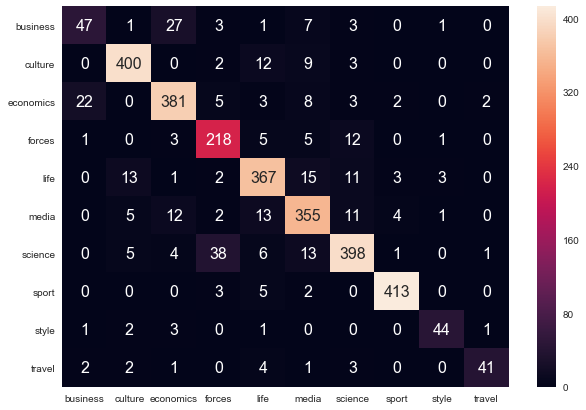

In [210]:
perform_cycle(grid_SVC.best_estimator_, data_train, data_test)

И действительно, 0.87 train vs 0.85 hold out. Давайте таки возьмем 5. 



(0.855635403046195, array([[ 46,   1,  29,   3,   1,   6,   3,   0,   1,   0],
        [  0, 398,   0,   3,  12,  10,   3,   0,   0,   0],
        [ 22,   0, 383,   3,   3,   9,   3,   2,   0,   1],
        [  1,   0,   3, 218,   5,   4,  13,   0,   1,   0],
        [  0,  14,   4,   2, 365,  15,   9,   3,   3,   0],
        [  0,   6,  12,   2,  15, 351,  12,   4,   1,   0],
        [  0,   4,   4,  38,   5,  13, 400,   1,   0,   1],
        [  0,   0,   0,   3,   5,   2,   0, 413,   0,   0],
        [  1,   1,   2,   0,   1,   0,   0,   0,  45,   2],
        [  1,   2,   1,   0,   4,   0,   3,   0,   0,  43]]))

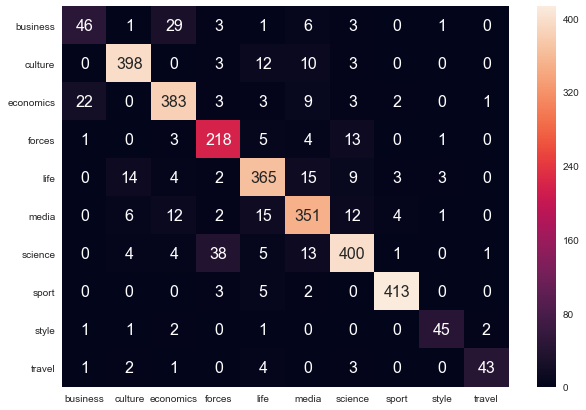

In [219]:
best_params_2 = grid_SVC.best_params_.copy()


best_params_2['tf-idf__min_df'] = 5

clf = LinearSVC()
pipeline_best = Pipeline([('tf-idf', tf_idf), ('clf', clf)])


pipeline_best.set_params(**best_params_2)

perform_cycle(pipeline_best, data_train, data_test)

Ну, грандиозно лучше не стало. Но что-то. 

# Дальше в программе логрег. В инкарнации SGDClassifier. 

При желании можно будет тонну вариантов лосса перебрать внутри одного интерфейса

/Users/eugeny.malyutin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


(0.7968875239813412, array([[ 16,   1,  54,   4,   2,   8,   5,   0,   0,   0],
        [  0, 392,   0,   2,  20,   9,   3,   0,   0,   0],
        [  4,   0, 393,   5,   4,  15,   2,   2,   0,   1],
        [  1,   0,   5, 221,   6,   5,   6,   0,   1,   0],
        [  0,  11,   1,   3, 372,  13,   7,   5,   3,   0],
        [  0,   5,   9,   2,  18, 351,  11,   6,   1,   0],
        [  0,   6,   4,  41,   7,  18, 389,   1,   0,   0],
        [  0,   0,   0,   4,   8,   0,   0, 411,   0,   0],
        [  1,   5,   3,   0,   0,   0,   3,   1,  38,   1],
        [  1,   2,   1,   0,  15,   2,   3,   0,   0,  30]]))

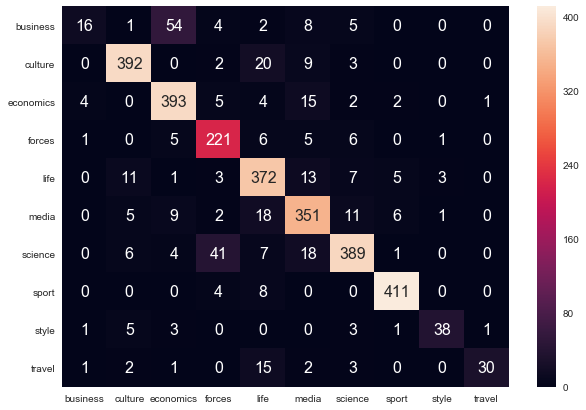

In [221]:
from sklearn.linear_model import SGDClassifier

#а это лог-регрессия
clf = SGDClassifier(loss="log")


pipeline_sgd = Pipeline([('tf-idf', tf_idf), ('clf', clf)])


perform_cycle(pipeline_sgd, data_train, data_test)



ну чет такое. Потюним? 


In [236]:

parameters = {
    'tf-idf__norm': ('l1', 'l2'), #ну а вдруг
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    'clf__max_iter': (10, 50),
    'tf-idf__max_df':[0.5], #возьмем из прошлого
    'tf-idf__min_df': [3,5],
}



grid_sgd = GridSearchCV(pipeline_sgd, parameters, n_jobs=5, scoring='f1_micro', verbose=10)


fitted_sgd = grid_sgd.fit(data_train['texts'], data_train['labels'])

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] clf__alpha=1e-05, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l1 
[CV] clf__alpha=1e-05, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l1 
[CV] clf__alpha=1e-05, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l1 
[CV] clf__alpha=1e-05, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2 
[CV] clf__alpha=1e-05, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2 
[CV]  clf__alpha=1e-05, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l1, score=0.8009990009990011, total=   3.9s
[CV]  clf__alpha=1e-05, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l1, score=0.8000000000000002, total=   4.0s
[CV] clf__alpha=1e-05, clf__max_iter=10, clf__penalty=l2, tf-idf__

[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    7.9s


[CV]  clf__alpha=1e-05, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2, score=0.8703296703296703, total=   4.4s
[CV] clf__alpha=1e-05, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l1 
[CV] clf__alpha=1e-05, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l1 
[CV]  clf__alpha=1e-05, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2, score=0.8692, total=   4.5s
[CV] clf__alpha=1e-05, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l2 
[CV]  clf__alpha=1e-05, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2, score=0.8678678678678678, total=   4.7s
[CV] clf__alpha=1e-05, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l2 
[CV]  clf__alpha=1e-05, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=5, t

[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:   15.8s


[CV]  clf__alpha=1e-05, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l1, score=0.811011011011011, total=   4.6s
[CV] clf__alpha=1e-05, clf__max_iter=10, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l1 
[CV] clf__alpha=1e-05, clf__max_iter=10, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l1 
[CV]  clf__alpha=1e-05, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l2, score=0.8693306693306694, total=   4.6s
[CV] clf__alpha=1e-05, clf__max_iter=10, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l1 
[CV]  clf__alpha=1e-05, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l2, score=0.8686, total=   4.7s
[CV] clf__alpha=1e-05, clf__max_iter=10, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2 
[CV]  clf__alpha=1e-05, clf__max_iter=10, clf__penalty=l2, tf-idf__

[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:   26.1s


[CV] clf__alpha=1e-05, clf__max_iter=10, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l1 
[CV]  clf__alpha=1e-05, clf__max_iter=10, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2, score=0.8701298701298701, total=   6.0s
[CV] clf__alpha=1e-05, clf__max_iter=10, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l1 
[CV]  clf__alpha=1e-05, clf__max_iter=10, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2, score=0.8692, total=   6.0s
[CV] clf__alpha=1e-05, clf__max_iter=10, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l2 
[CV]  clf__alpha=1e-05, clf__max_iter=10, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2, score=0.8678678678678678, total=   6.2s
[CV]  clf__alpha=1e-05, clf__max_iter=10, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l1, score=0.8053946053946054, total=   6.1s
[

[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:   41.5s


[CV] clf__alpha=1e-05, clf__max_iter=50, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l1 
[CV]  clf__alpha=1e-05, clf__max_iter=10, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l2, score=0.8682, total=   6.1s
[CV] clf__alpha=1e-05, clf__max_iter=50, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2 
[CV]  clf__alpha=1e-05, clf__max_iter=10, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l2, score=0.8654654654654654, total=   6.1s
[CV] clf__alpha=1e-05, clf__max_iter=50, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2 
[CV]  clf__alpha=1e-05, clf__max_iter=50, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l1, score=0.8037962037962038, total=   7.8s
[CV] clf__alpha=1e-05, clf__max_iter=50, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2 
[CV]  clf__alpha=1e-05, clf__max_iter=50, clf__penalty=l2, tf-idf__max_df=0.5, tf-

[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  1.1min


[CV] clf__alpha=1e-05, clf__max_iter=50, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l2 
[CV]  clf__alpha=1e-05, clf__max_iter=50, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l1, score=0.8044, total=   8.5s
[CV] clf__alpha=1e-05, clf__max_iter=50, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l1 
[CV]  clf__alpha=1e-05, clf__max_iter=50, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l1, score=0.8092092092092092, total=   8.4s
[CV] clf__alpha=1e-05, clf__max_iter=50, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l1 
[CV]  clf__alpha=1e-05, clf__max_iter=50, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l2, score=0.868931068931069, total=   8.1s
[CV] clf__alpha=1e-05, clf__max_iter=50, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l1 
[CV]  clf__alpha=1e-05, clf__max_iter=50, clf__penalty=l2, tf-idf__max_df=0

[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.5min


[CV] clf__alpha=1e-05, clf__max_iter=50, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l1 
[CV]  clf__alpha=1e-05, clf__max_iter=50, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2, score=0.868, total=  14.4s
[CV] clf__alpha=1e-05, clf__max_iter=50, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l2 
[CV]  clf__alpha=1e-05, clf__max_iter=50, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2, score=0.8668668668668668, total=  14.5s
[CV] clf__alpha=1e-05, clf__max_iter=50, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l2 
[CV]  clf__alpha=1e-05, clf__max_iter=50, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l1, score=0.8057942057942058, total=  13.9s
[CV] clf__alpha=1e-05, clf__max_iter=50, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l2 
[CV]  clf__alpha=1e-05, clf__max_iter=50, c

[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:  2.0min


[CV] clf__alpha=1e-06, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l1 
[CV]  clf__alpha=1e-06, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2, score=0.8657342657342657, total=   5.6s
[CV] clf__alpha=1e-06, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l1 
[CV]  clf__alpha=1e-06, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2, score=0.8658000000000001, total=   5.6s
[CV] clf__alpha=1e-06, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l2 
[CV]  clf__alpha=1e-06, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2, score=0.8642642642642643, total=   5.4s
[CV] clf__alpha=1e-06, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l2 
[CV]  clf__alpha=1e-06, clf__max_iter=10, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf_

[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:  2.4min


[CV] clf__alpha=1e-06, clf__max_iter=10, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l1 
[CV]  clf__alpha=1e-06, clf__max_iter=10, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l1, score=0.8536536536536536, total=   8.0s
[CV] clf__alpha=1e-06, clf__max_iter=10, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l1 
[CV]  clf__alpha=1e-06, clf__max_iter=10, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2, score=0.8667332667332668, total=   8.5s
[CV] clf__alpha=1e-06, clf__max_iter=10, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l1 
[CV]  clf__alpha=1e-06, clf__max_iter=10, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2, score=0.8662, total=   8.7s
[CV] clf__alpha=1e-06, clf__max_iter=10, clf__penalty=elasticnet, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l2 
[CV]  clf__alpha=1e-06, clf__max_iter=10, 

[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed:  3.4min


[CV] clf__alpha=1e-06, clf__max_iter=50, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l1 
[CV]  clf__alpha=1e-06, clf__max_iter=50, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2, score=0.8693306693306694, total=  26.1s
[CV] clf__alpha=1e-06, clf__max_iter=50, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l1 
[CV]  clf__alpha=1e-06, clf__max_iter=50, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2, score=0.8701999999999999, total=  25.3s
[CV] clf__alpha=1e-06, clf__max_iter=50, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l2 
[CV]  clf__alpha=1e-06, clf__max_iter=50, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=3, tf-idf__norm=l2, score=0.8658658658658659, total=  21.1s
[CV] clf__alpha=1e-06, clf__max_iter=50, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf__min_df=5, tf-idf__norm=l2 
[CV]  clf__alpha=1e-06, clf__max_iter=50, clf__penalty=l2, tf-idf__max_df=0.5, tf-idf_

[Parallel(n_jobs=5)]: Done  96 out of  96 | elapsed:  5.4min finished


In [244]:
print("best params \n"  + str(fitted_sgd.best_params_))

print("best score")
print(fitted_sgd.best_score_)

best params 
{'clf__alpha': 1e-05, 'clf__max_iter': 10, 'clf__penalty': 'l2', 'tf-idf__max_df': 0.5, 'tf-idf__min_df': 3, 'tf-idf__norm': 'l2'}
best score
0.8691333333333333


(0.8427637276575964, array([[ 41,   1,  33,   3,   1,   7,   3,   0,   1,   0],
        [  0, 397,   0,   3,  13,  10,   3,   0,   0,   0],
        [ 19,   0, 383,   5,   3,  11,   2,   2,   0,   1],
        [  1,   0,   4, 217,   5,   4,  13,   0,   1,   0],
        [  0,  10,   2,   2, 372,  12,   9,   4,   4,   0],
        [  0,   5,  11,   1,  13, 355,  12,   5,   1,   0],
        [  0,   6,   4,  35,   7,  13, 400,   1,   0,   0],
        [  0,   0,   0,   2,   5,   2,   0, 414,   0,   0],
        [  1,   2,   3,   0,   1,   0,   2,   1,  41,   1],
        [  2,   2,   1,   0,   7,   1,   3,   0,   0,  38]]))

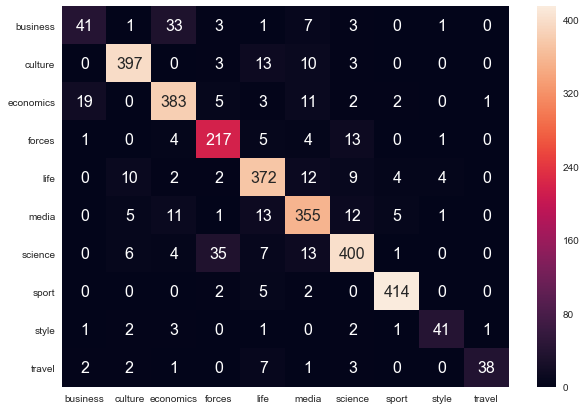

In [246]:
perform_cycle(fitted_sgd.best_estimator_, data_train, data_test)

вышло похуже чем у SVM. Ну и бывает. 

In [ ]:
# Бонус-трек - интерпретабилити. 

In [260]:
# посмотрим что там внутрях; да, это из "введения в науку о данных"
import eli5
from eli5.lime import TextExplainer


pipeline_sgd = fitted.best_estimator_

pipeline_sgd.fit(data_train['texts'],data_train['labels'])
target_names = pipeline_sgd.named_steps['clf'].classes_.tolist()

pred = pipeline_sgd.predict(data_test['texts'])
score = metrics.f1_score(data_test['labels'], pred, average='macro')
print("F1 score: ", score)



F1 score:  0.8535560733975072


('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0))

Посмотрим на топ-фичи у топ-свм:

In [263]:
eli5.show_weights(pipeline_sgd.steps[1][1], vec = pipeline_sgd.steps[0][1],  top=10,
                  target_names=target_names)


В принципе все ок. 

Но:
1) Странно, что так мало фичей title_ в топе. Возможно, стоило их векторизовать отдельно
2) судя по "+2.269	интернет" - стоило добавить биграммы, потому что тот же интернет вполне может быть в виде составных слов интернет-портал и пр

In [230]:
te = TextExplainer(random_state=42)
te.fit(data_test['texts'].values[0], pipeline_sgd.predict_proba)
print("Real Category: ", data_test['labels'].values[0])
te.show_prediction(target_names=target_names)


Real Category:  culture


# Выводы:

- Сжатие размерности не помогает.
- SVM хорош, логрег - не очень. В принципе это и логично - разные категории на таких текстах прям идеальная задача для разделяющих поверхностей
- тюнить гиперпараметры надо аккуратно, а то можно и min_df=1 огрести
- Фичи адекватое, но пристальное в них смотрение может привести к интересным выводам. Проверять их я, конечно же, не буду =) 


## Чего можно было сделать ещё:
- Добавить биграммы
- Отдельно разложить на tfidf вектора заголовка и текста
- Взвесить классы в SVM обратно-пропорционально встречаемости
- эмбеддинги на таком тексте не круто. Можно было бы взять эмбеддинги внешние, было бы лучше. Но не факт. 
- пожестче почистить текст стоп-словами из топ-а по встречаемости в корпусе